<a href="https://colab.research.google.com/github/suelberrangel/suelberrangel/blob/main/FoodsBrazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Delivery Center: Food & Goods orders in Brazil

In [ ]:
#https://www.kaggle.com/nosbielcs/brazilian-delivery-center



df = pd.read_csv("https://www.kaggle.com/input/brazilian-delivery-center/payments.csv")


import pandas as pd
import seaborn as sns

#-----IMPORTANDO AS TABELAS-----
#df1 é a tabela que sera usada
df1 = pd.read_csv('orders.csv')

#df2 tabela de complemento
df2 = pd.read_csv('payments.csv')

#df3 tabela de complemento
df3 = pd.read_csv('channels.csv')

In [ ]:
# -----EXCLUINDO COLUNAS QUE NÃO SERÃO USADAS-----

# COLUNAS DF1
df1excluir = df1.drop(columns = ['order_moment_created', 'order_moment_accepted',
       'order_moment_ready', 'order_moment_collected',
       'order_moment_in_expedition', 'order_moment_delivering',
       'order_moment_delivered', 'order_moment_finished',
       'order_metric_collected_time', 'order_metric_paused_time',
       'order_metric_production_time', 'order_metric_walking_time',
       'order_metric_expediton_speed_time', 'order_metric_transit_time',
       'order_metric_cycle_time','order_created_year','order_created_minute',
        'order_delivery_cost','store_id','delivery_order_id','order_id'])

# COLUNAS DF2
df2excluir = df2.drop(columns = ['payment_id','payment_status'])

# COLUNAS DF3
df3excluir = df3.drop(columns = ['channel_name'])

#-----JUNÇÃO DAS TABELAS-----

In [ ]:


# As tabelas df1 e df2 se unem pela coluna 'payment_order_id' ID do pagador

df1e2 = df1excluir.merge(df2excluir)

# A tabela resultante de df1+df2 irão agregar também a df3 pela coluna 'channel_id' e 'channel_type'

df = df1e2.merge(df3excluir)

In [ ]:
# Alterando o nome das colunas

df.columns = ['CANAL_DEVENDA',
              'ID_PAGAMENTO',
              'STATUS',
              'VALOR',
              'RECEITA_FRETE',
              'HORACRIADOPEDIDO',
              'DIA_DA_COMPRA',
              'MES_DA_COMPRA',
              'VALOR_PAGAMENTO',
              'VALOR_DESCONTO',
              'METODO_PAGAMENTO',
              'ORIGEMCOMPRA']

In [ ]:
# Encontrando valores nulos do df

print(df.isna().sum())
df[df['VALOR_DESCONTO'].isnull()]


CANAL_DEVENDA       0
ID_PAGAMENTO        0
STATUS              0
VALOR               0
RECEITA_FRETE       0
HORACRIADOPEDIDO    0
DIA_DA_COMPRA       0
MES_DA_COMPRA       0
VALOR_PAGAMENTO     0
VALOR_DESCONTO      0
METODO_PAGAMENTO    0
ORIGEMCOMPRA        0
dtype: int64


,CANAL_DEVENDA,ID_PAGAMENTO,STATUS,VALOR,RECEITA_FRETE,HORACRIADOPEDIDO,DIA_DA_COMPRA,MES_DA_COMPRA,VALOR_PAGAMENTO,VALOR_DESCONTO,METODO_PAGAMENTO,ORIGEMCOMPRA


In [ ]:
# Podemos considerar que valores NaN, são celulas onde não houve desconto e então substituir por "0"

df = df.fillna(0)

In [ ]:
#Verificando quantos compras foram CANCELADAS e quantas FINALIZADAS;
df.STATUS.str.count("CANCELED").sum()

8

In [ ]:
# Remover as linhas com status CANCELED - visto que são 8 registros apennas;

dfn1 = df.loc[df['STATUS']!='CANCELED']

In [ ]:
dfn1.STATUS.str.count("CANCELED").sum()

0

<AxesSubplot:>

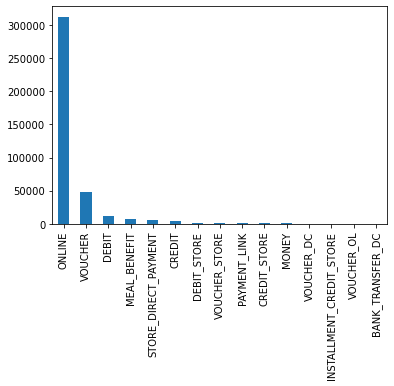

In [ ]:
# Verificando os metodos de pagamento

dfn1.METODO_PAGAMENTO.value_counts().plot(kind='bar') 

In [ ]:
dfn1['METODO_PAGAMENTO'].value_counts()

ONLINE                      312372
VOUCHER                      48570
DEBIT                        12346
MEAL_BENEFIT                  6687
STORE_DIRECT_PAYMENT          6574
CREDIT                        4966
DEBIT_STORE                   1997
VOUCHER_STORE                 1683
PAYMENT_LINK                  1611
CREDIT_STORE                  1266
MONEY                         1190
VOUCHER_DC                     465
INSTALLMENT_CREDIT_STORE       452
VOUCHER_OL                     347
BANK_TRANSFER_DC               300
Name: METODO_PAGAMENTO, dtype: int64

In [ ]:
# A coluna STATUS - Todos são FINISHED, esta coluna será removida
# A coluna CANAL_DEVENDA, tem correlacao com a coluna ORIGEMCOMPRA, que por sua vez é binária. Será removida também por não agregar informação

In [ ]:
df = dfn1.drop(columns = ['CANAL_DEVENDA','STATUS','VALOR_PAGAMENTO'])


In [ ]:
# vou transformar os valores em binários para facilitar;

#OWN CHANNEL = CANAL PRÓPRIO | MARKETPLACE = CAMPANHAS

dfn1['ORIGEMCOMPRA'].value_counts() 

MARKETPLACE    366823
OWN CHANNEL     34003
Name: ORIGEMCOMPRA, dtype: int64

In [ ]:
#mudando o index do df para o ID_PAGAMENTO
df.set_index('ID_PAGAMENTO', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400826 entries, 68410055 to 92026482
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   VALOR             400826 non-null  float64
 1   RECEITA_FRETE     400826 non-null  float64
 2   HORACRIADOPEDIDO  400826 non-null  int64  
 3   DIA_DA_COMPRA     400826 non-null  int64  
 4   MES_DA_COMPRA     400826 non-null  int64  
 5   VALOR_DESCONTO    400826 non-null  float64
 6   METODO_PAGAMENTO  400826 non-null  object 
 7   ORIGEMCOMPRA      400826 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 27.5+ MB


In [ ]:
# Mudando a categoria das colunas

df[['ORIGEMCOMPRA', 'METODO_PAGAMENTO']] = df[['ORIGEMCOMPRA', 'METODO_PAGAMENTO']].astype('category')

In [ ]:
# Inserindo duas novas colunas com códigos para substituir as palavras

df['ORIGEMCOMPRA01'] = df['ORIGEMCOMPRA'].cat.codes
df['METODO_PAGAMENTO01'] = df['METODO_PAGAMENTO'].cat.codes

In [ ]:
#TABELA DE REFERENCIA DOS METODOS DE PAGAMENTO = VARIAVEL: REFERÊNCIA

REFERENCIA01 = df['METODO_PAGAMENTO01'].value_counts().reset_index().sort_values(by='index')
REFERENCIA02 = df['METODO_PAGAMENTO'].value_counts().reset_index()

In [ ]:
REFERENCIA = REFERENCIA01.merge(REFERENCIA02, left_on='METODO_PAGAMENTO01', right_on='METODO_PAGAMENTO')

In [ ]:
dfclean = df.drop(columns = ['METODO_PAGAMENTO','ORIGEMCOMPRA'])

In [ ]:
dfclean

,VALOR,RECEITA_FRETE,HORACRIADOPEDIDO,DIA_DA_COMPRA,MES_DA_COMPRA,VALOR_DESCONTO,ORIGEMCOMPRA01,METODO_PAGAMENTO01
ID_PAGAMENTO,,,,,,,,
68410055,394.80,0.01,2,1,1,0.00,0,11
68410055,394.80,0.01,2,1,1,7.90,0,8
68681903,39.98,0.01,19,2,1,0.80,0,8
69106464,99.90,9.90,14,4,1,2.20,0,8
69322208,39.99,0.01,13,5,1,0.80,0,8
...,...,...,...,...,...,...,...,...
93101050,299.90,0.00,17,29,4,6.00,0,8
93101239,499.80,0.00,18,29,4,10.00,0,8
93133728,209.80,0.00,21,30,4,4.20,0,10


In [ ]:
dfclean.sort_values(by='VALOR', ascending=False).head(10)

,VALOR,RECEITA_FRETE,HORACRIADOPEDIDO,DIA_DA_COMPRA,MES_DA_COMPRA,VALOR_DESCONTO,ORIGEMCOMPRA01,METODO_PAGAMENTO01
ID_PAGAMENTO,,,,,,,,
93127697,100000.11,0.0,16,30,4,2000.00,1,8
87203888,25000.00,0.0,14,31,3,500.00,1,8
87201782,20000.00,0.0,14,31,3,400.00,1,8
84783840,15962.00,0.0,20,19,3,239.43,1,10
90195104,15000.00,0.0,16,14,4,300.00,1,14
89385477,13584.00,0.0,18,10,4,271.68,1,14
90166852,12000.00,0.0,13,14,4,240.00,1,14
84294647,10089.29,8.9,17,17,3,201.96,1,10
87267179,10000.00,0.0,19,31,3,200.00,1,8


<AxesSubplot:xlabel='ID_PAGAMENTO'>

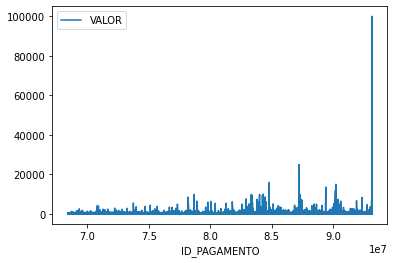

In [ ]:
dfclean[['VALOR']].plot()

In [ ]:
dffiltrado = dfclean.loc[dfclean['VALOR'] <7500.00]

In [ ]:
dffiltrado

,VALOR,RECEITA_FRETE,HORACRIADOPEDIDO,DIA_DA_COMPRA,MES_DA_COMPRA,VALOR_DESCONTO,ORIGEMCOMPRA01,METODO_PAGAMENTO01
ID_PAGAMENTO,,,,,,,,
68410055,394.80,0.01,2,1,1,0.00,0,11
68410055,394.80,0.01,2,1,1,7.90,0,8
68681903,39.98,0.01,19,2,1,0.80,0,8
69106464,99.90,9.90,14,4,1,2.20,0,8
69322208,39.99,0.01,13,5,1,0.80,0,8
...,...,...,...,...,...,...,...,...
93101050,299.90,0.00,17,29,4,6.00,0,8
93101239,499.80,0.00,18,29,4,10.00,0,8
93133728,209.80,0.00,21,30,4,4.20,0,10


<AxesSubplot:xlabel='ID_PAGAMENTO'>

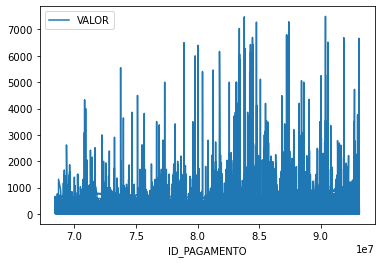

In [ ]:
dffiltrado[['VALOR']].plot()

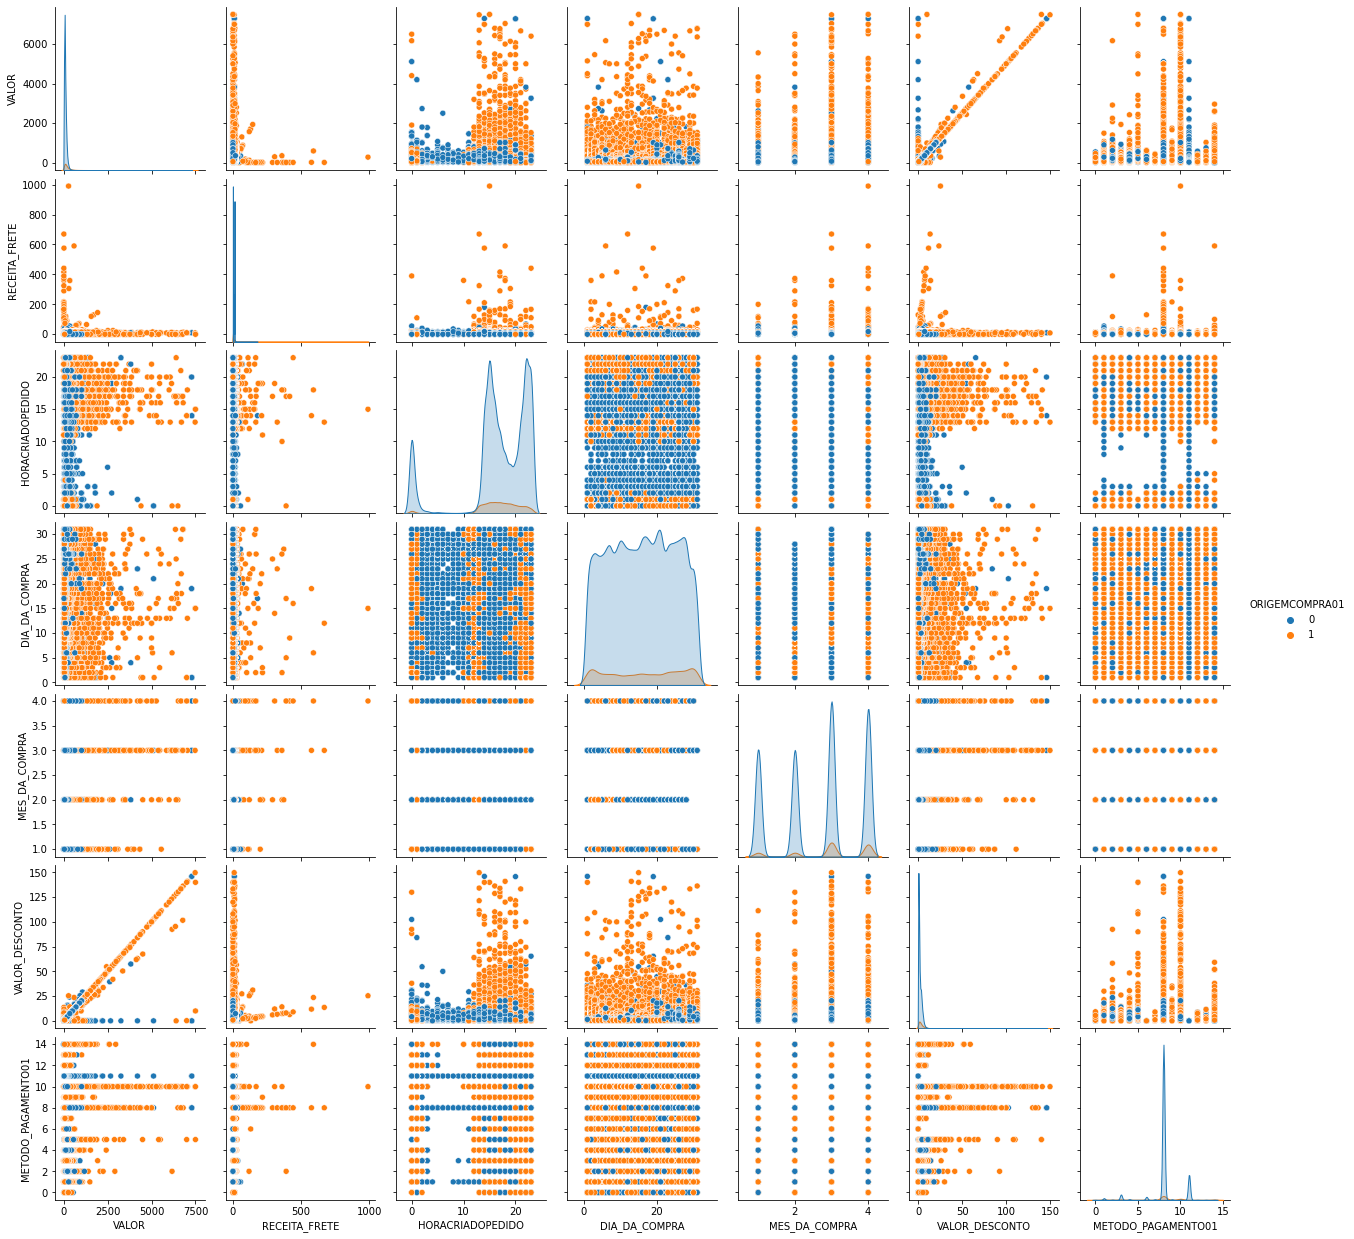

In [ ]:
sns.pairplot(dffiltrado, hue='ORIGEMCOMPRA01')

C:\Users\Suelber Rangel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt' is not defined

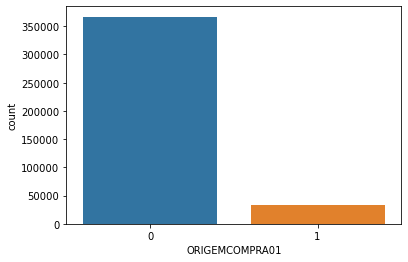

In [ ]:
sns.countplot('ORIGEMCOMPRA01', data=dffiltrado)
plt.ylabel('HORACRIADOPEDIDO', fontsize=13)
plt.xlabel('VALOR',fontsize=13);

C:\Users\Suelber Rangel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HORACRIADOPEDIDO', ylabel='count'>

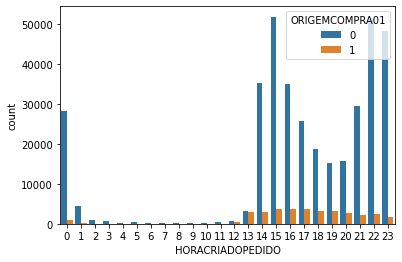

In [ ]:
sns.countplot('HORACRIADOPEDIDO', data=dffiltrado, hue='ORIGEMCOMPRA01')



<AxesSubplot:xlabel='ORIGEMCOMPRA01', ylabel='HORACRIADOPEDIDO'>

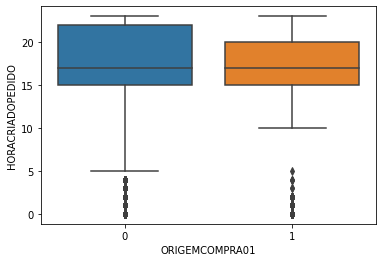

In [ ]:
sns.boxplot(x='ORIGEMCOMPRA01', y='HORACRIADOPEDIDO', data=dffiltrado)

# MONTANDO IA

In [ ]:
#separando os dados

X = dffiltrado.drop(["ORIGEMCOMPRA01"],axis = 1) 

y = dffiltrado["ORIGEMCOMPRA01"] 

In [ ]:
from sklearn.model_selection import train_test_split

# 80% dos dados para treino do modelo e 20% para o teste (nayve )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [ ]:
# Importando o pacote com o modelo 
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Definindo o modelo escolhido
modelo = GaussianNB()

In [ ]:
modelo.fit(X_train,y_train)

GaussianNB()

In [ ]:
X_test

,VALOR,RECEITA_FRETE,HORACRIADOPEDIDO,DIA_DA_COMPRA,MES_DA_COMPRA,VALOR_DESCONTO,METODO_PAGAMENTO01
ID_PAGAMENTO,,,,,,,
89791906,31.80,0.0,23,11,4,0.48,8
83727551,55.50,11.9,0,15,3,1.00,8
71046340,109.50,8.9,17,13,1,1.78,8
75560927,48.99,15.9,6,4,2,1.30,8
77695752,65.00,0.0,16,14,2,0.98,8
...,...,...,...,...,...,...,...
71289198,29.90,0.0,19,14,1,0.30,3
74665208,107.60,9.0,19,30,1,1.75,8
92922626,25.20,0.0,22,27,4,0.38,8


In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [ ]:

print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Previsto'], margins=True))

Previsto      0     1    All
Real                        
0         71436  1965  73401
1          5109  1651   6760
All       76545  3616  80161


# Verificando qualidade do modelo de classificação

In [ ]:
from sklearn.metrics import classification_report

class_names = ['OWN CHANNEL', 'MARKETPLACE']

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 OWN CHANNEL       0.93      0.97      0.95     73401
 MARKETPLACE       0.46      0.24      0.32      6760

    accuracy                           0.91     80161
   macro avg       0.69      0.61      0.64     80161
weighted avg       0.89      0.91      0.90     80161



In [ ]:
#--------------

from sklearn.datasets import make_classification
# Criação do conjunto sintético
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# Resumo dos dados
print(X.shape, y.shape)

(1000, 20) (1000,)


In [ ]:
# Importação de uma ferramenta que divide os conjuntos (Treino e Teste)
from sklearn.model_selection import train_test_split

# Vamos utilizar 80% dos nossos dados para treinar o modelo e 20% para testar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Importando o pacote com o modelo 
from sklearn.ensemble import RandomForestClassifier

# Definindo o modelo escolhido
modelo = RandomForestClassifier(n_estimators=10)

In [ ]:
modelo.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
# Outra forma de exibir as medidas de desempenho de classificação
from sklearn.metrics import classification_report

class_names = ['Classe 1', 'Classe 2']

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    Classe 1       0.85      0.94      0.89       114
    Classe 2       0.91      0.78      0.84        86

    accuracy                           0.87       200
   macro avg       0.88      0.86      0.86       200
weighted avg       0.87      0.87      0.87       200

